**Global Superstore dataset contains information about sales and orders in a global superstore. Insights derived:**
1. TOP 10 SALES COUNTRIES
2. TOP 10 SALES CATEGORY
3. PURCHASING PATTERNS BY SEGMENT
4. AVERAGE SHIPPING COST BY YEAR
5. MOST AND LEAST PREFFERED SHIPPING MODES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('superstore.csv')
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [4]:
df.shape

(51290, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [5]:
df['Customer.ID'].nunique()

4873

In [5]:
df.drop('记录数',axis=1,inplace=True)

**1. TOP 10 SALES COUNTRIES**

In [11]:
country_sales = df.groupby('Country')['Sales'].sum().reset_index()
country_sales

,Country,Sales
0,Afghanistan,21674
1,Albania,3888
2,Algeria,36090
3,Angola,25551
4,Argentina,57510
...,...,...
142,Venezuela,26587
143,Vietnam,65802
144,Yemen,2464
145,Zambia,26029


In [12]:
country_sales = country_sales.sort_values(by='Sales',ascending=False)
country_sales

,Country,Sales
139,United States,2297354
6,Australia,925257
44,France,858930
26,China,700591
47,Germany,628857
...,...,...
127,Tajikistan,242
75,Macedonia,210
40,Eritrea,188
5,Armenia,156


In [13]:
top_10_countries_by_Sales = country_sales.head(10)
top_10_countries_by_Sales

,Country,Sales
139,United States,2297354
6,Australia,925257
44,France,858930
26,China,700591
47,Germany,628857
81,Mexico,622620
57,India,589664
138,United Kingdom,528570
58,Indonesia,404887
17,Brazil,361098


Text(0.5, 1.0, 'Top 10 Sales Countries')

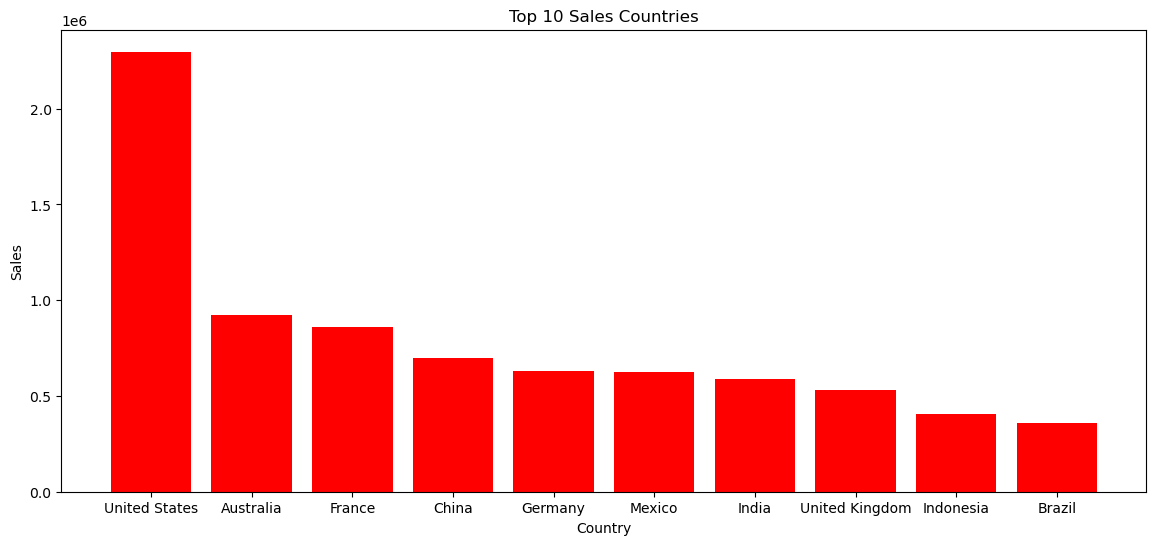

In [23]:
plt.figure(figsize=(14,6))
plt.bar(top_10_countries_by_Sales['Country'],top_10_countries_by_Sales['Sales'],color='red')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Top 10 Sales Countries')

**2. TOP 10 SALES CATEGORY**

In [40]:
df['Sub.Category'].unique()

array(['Paper', 'Art', 'Storage', 'Appliances', 'Supplies', 'Envelopes',
       'Fasteners', 'Labels', 'Binders', 'Accessories', 'Phones',
       'Copiers', 'Machines', 'Tables', 'Bookcases', 'Chairs',
       'Furnishings'], dtype=object)

In [32]:
Sales_by_Category = df.groupby('Sub.Category')['Sales'].sum().reset_index()
Sales_by_Category

,Sub.Category,Sales
0,Accessories,749307
1,Appliances,1011081
2,Art,372163
3,Binders,461952
4,Bookcases,1466559
5,Chairs,1501682
6,Copiers,1509439
7,Envelopes,170926
8,Fasteners,83254
9,Furnishings,385609


In [33]:
Sales_by_Category = Sales_by_Category.sort_values(by='Sales',ascending=False)
Sales_by_Category

,Sub.Category,Sales
13,Phones,1706874
6,Copiers,1509439
5,Chairs,1501682
4,Bookcases,1466559
14,Storage,1127124
1,Appliances,1011081
11,Machines,779071
16,Tables,757034
0,Accessories,749307
3,Binders,461952


In [34]:
top_10_Sales_by_Category = Sales_by_Category.head(10)
top_10_Sales_by_Category

,Sub.Category,Sales
13,Phones,1706874
6,Copiers,1509439
5,Chairs,1501682
4,Bookcases,1466559
14,Storage,1127124
1,Appliances,1011081
11,Machines,779071
16,Tables,757034
0,Accessories,749307
3,Binders,461952


Text(0.5, 1.0, 'Top 10 Sales Category')

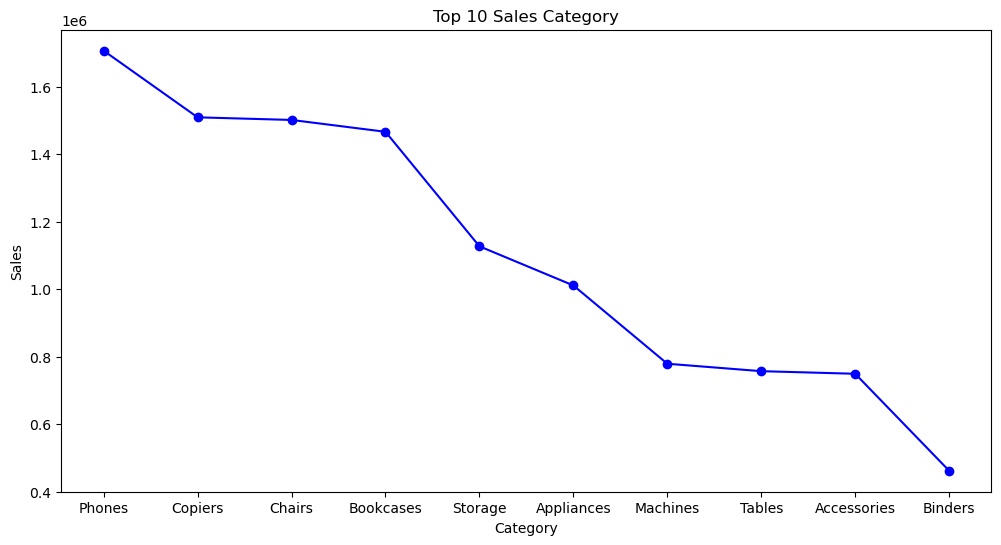

In [51]:
plt.figure(figsize=(12,6))
plt.plot(top_10_Sales_by_Category['Sub.Category'],top_10_Sales_by_Category['Sales'],color='blue',marker='o')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Top 10 Sales Category')

**3. PURCHASING PATTERNS BY SEGMENT**

In [42]:
df.head(2)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4


In [43]:
df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [45]:
seg = df.groupby('Segment')['Sales'].sum().reset_index()
seg

,Segment,Sales
0,Consumer,6508141
1,Corporate,3824808
2,Home Office,2309956


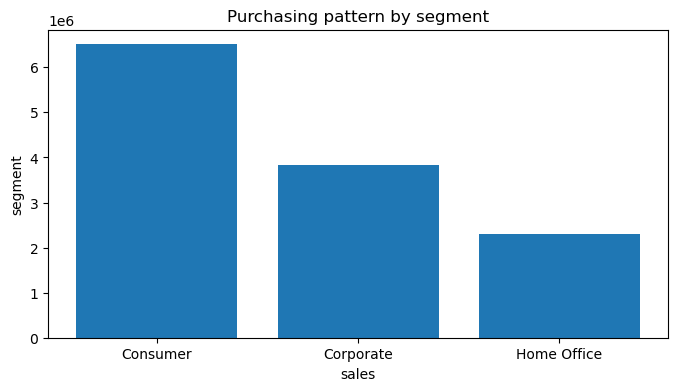

In [49]:
plt.figure(figsize=(8,4))
plt.bar(seg['Segment'],seg['Sales'])
plt.xlabel('sales')
plt.ylabel('segment')
plt.title('Purchasing pattern by segment')
plt.show()

**4. AVERAGE SHIPPING COST BY YEAR**

In [63]:
avg_shiping_cost = df.groupby('Year')['Shipping.Cost'].mean().reset_index()
avg_shiping_cost

,Year,Shipping.Cost
0,2011,27.147182
1,2012,25.861232
2,2013,26.418490
3,2014,26.268085


Text(0.5, 1.0, 'Avg Shipping Cost by Year')

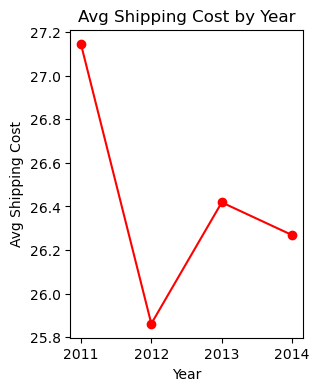

In [80]:
plt.figure(figsize=(3,4))
plt.plot(avg_shiping_cost['Year'],avg_shiping_cost['Shipping.Cost'],'r',marker='o')
plt.xlabel('Year') 
plt.ylabel('Avg Shipping Cost')
plt.title('Avg Shipping Cost by Year')

**5. MOST AND LEAST PREFFERED SHIPPING MODES**

In [76]:
ship_mode = df.groupby('Ship.Mode')['Customer.ID'].count().reset_index()
ship_mode

,Ship.Mode,Customer.ID
0,First Class,7505
1,Same Day,2701
2,Second Class,10309
3,Standard Class,30775


Text(0.5, 1.0, 'Customers preffered shipping mode')

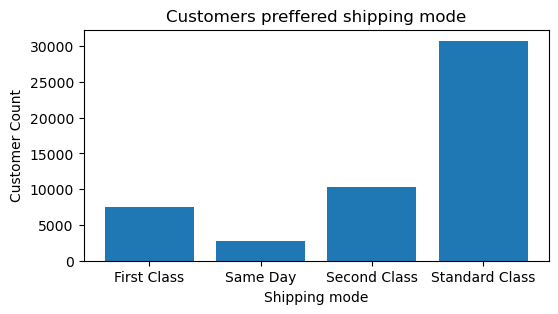

In [77]:
plt.figure(figsize=(6,3))
plt.bar(ship_mode['Ship.Mode'],ship_mode['Customer.ID'])
plt.xlabel('Shipping mode')
plt.ylabel('Customer Count')
plt.title('Customers preffered shipping mode')